In [3]:
import pandas as pd

words = pd.read_csv('oas_pair_heavy.csv', usecols=['fwr1_aa_heavy'])['fwr1_aa_heavy'].tolist()
# words = open('names.txt', 'r').read().splitlines()

In [4]:
words[:10]

['QVQLKESGPGLVQPSQTLSLTCTVS',
 'QVQLQQSGAELTKPGSSVKISCKAS',
 'EVQLQESGPGLVKPSQSLSLTCSVT',
 'EVQLVESGGGLVQPGRSLKLSCLAS',
 'QVQLKESGPVLVQASETLSLTCTVS',
 'EVQLVESGGGLVQPGRSLKLSCLAS',
 'EVQLVESGEGLVQPGSSMKLSCVAS',
 'EVQLVESGGGLVQPGRSLKLSCAAS',
 'QVTLKESGPGILQPSQTLSLTCTFS',
 'EVQLVESGGGLVQPGRSLKLSCAAS']

In [5]:
len(words)

121679

In [6]:
min(len(word) for word in words)

1

In [7]:
max(len(word) for word in words)

32

In [8]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [9]:
sorted(b.items(), key=lambda x: -x[1])

[(('V', 'Q'), 156485),
 (('L', 'V'), 142679),
 (('P', 'G'), 117226),
 (('G', 'G'), 112247),
 (('S', '<E>'), 111776),
 (('S', 'G'), 110945),
 (('Q', 'L'), 104344),
 (('A', 'S'), 99321),
 (('L', 'S'), 88993),
 (('S', 'C'), 86635),
 (('V', 'K'), 85392),
 (('S', 'L'), 82149),
 (('E', 'S'), 79385),
 (('G', 'L'), 66290),
 (('E', 'V'), 62484),
 (('<S>', 'Q'), 60376),
 (('Q', 'P'), 58470),
 (('<S>', 'E'), 55446),
 (('K', 'P'), 53622),
 (('Q', 'V'), 52772),
 (('L', 'K'), 50236),
 (('G', 'A'), 50135),
 (('L', 'Q'), 47338),
 (('K', 'L'), 44991),
 (('Q', 'S'), 44967),
 (('G', 'P'), 43116),
 (('V', 'E'), 42462),
 (('S', 'V'), 40288),
 (('C', 'A'), 38594),
 (('C', 'K'), 36931),
 (('A', 'A'), 34655),
 (('T', 'C'), 34238),
 (('T', 'L'), 34068),
 (('L', 'T'), 32598),
 (('K', 'A'), 30821),
 (('G', 'S'), 30790),
 (('P', 'S'), 30364),
 (('V', 'S'), 29464),
 (('E', 'L'), 26940),
 (('Q', 'Q'), 25369),
 (('G', 'R'), 24301),
 (('C', 'T'), 24148),
 (('R', 'S'), 23908),
 (('A', 'E'), 23007),
 (('T', 'V'), 21108

In [18]:
import torch

In [19]:
N = torch.zeros((21, 21), dtype=torch.int32)
char = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i, s in enumerate(char)}
stoi['.'] = 0

In [20]:
stoi

{'A': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'K': 9,
 'L': 10,
 'M': 11,
 'N': 12,
 'P': 13,
 'Q': 14,
 'R': 15,
 'S': 16,
 'T': 17,
 'V': 18,
 'W': 19,
 'Y': 20,
 '.': 0}

In [21]:
itos = {i: s for s, i in stoi.items()}

In [22]:
itos

{1: 'A',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'K',
 10: 'L',
 11: 'M',
 12: 'N',
 13: 'P',
 14: 'Q',
 15: 'R',
 16: 'S',
 17: 'T',
 18: 'V',
 19: 'W',
 20: 'Y',
 0: '.'}

In [23]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [24]:
N.shape

torch.Size([21, 21])

(-0.5, 20.5, 20.5, -0.5)

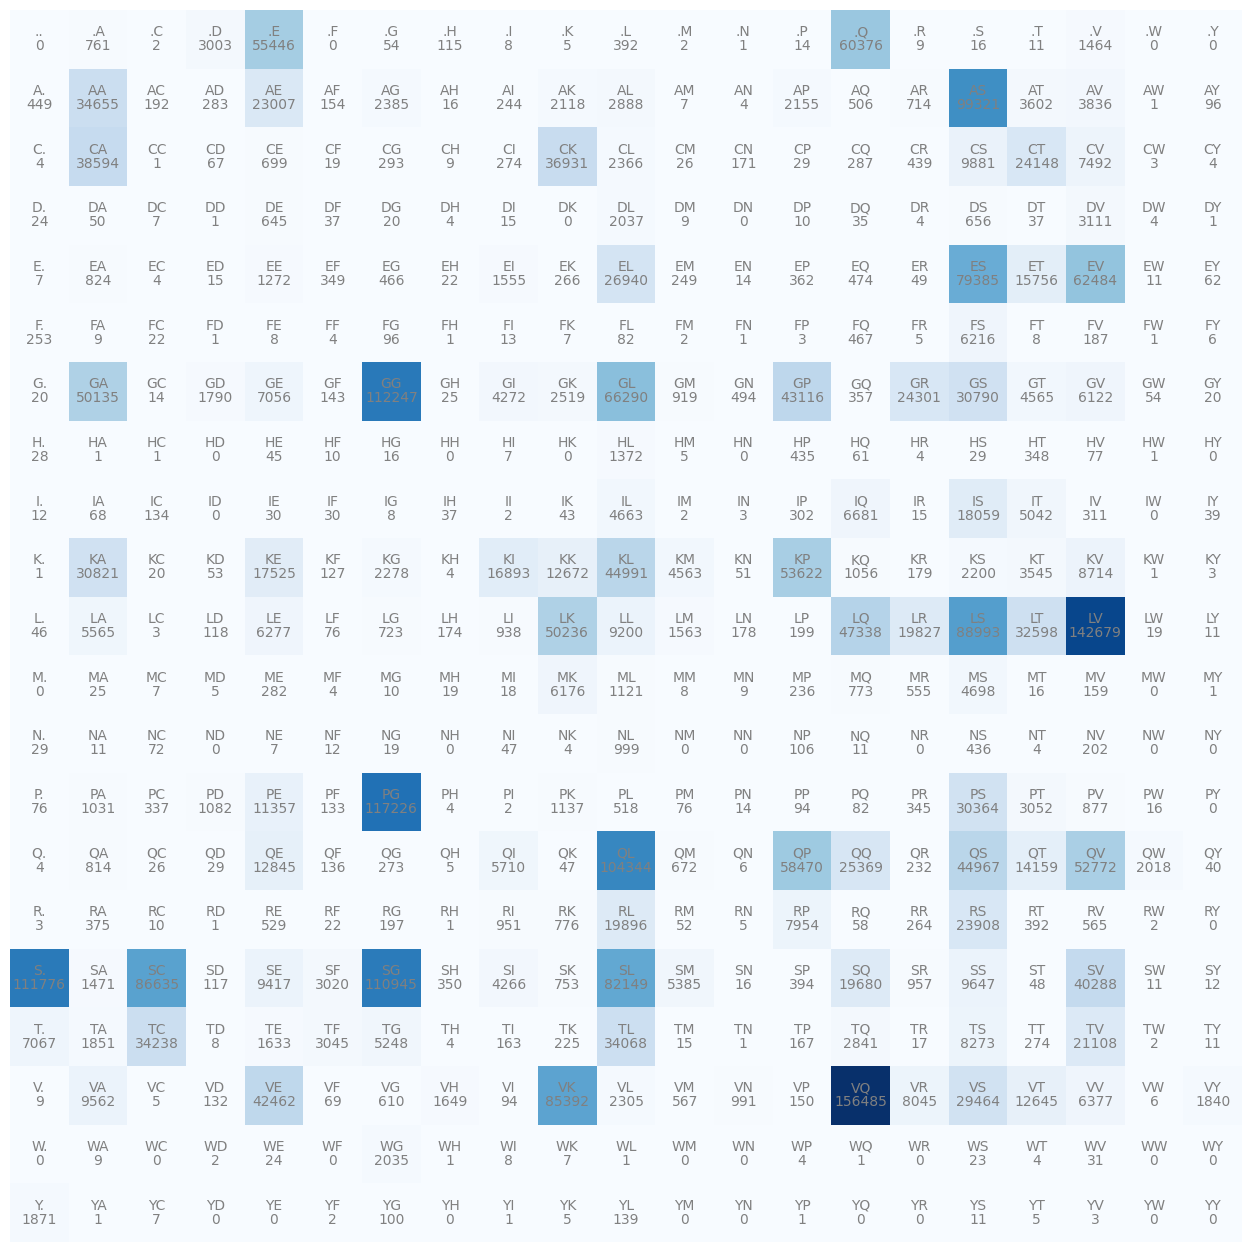

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(21):
    for j in range(21):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')

In [29]:
N[0]

tensor([    0,   761,     2,  3003, 55446,     0,    54,   115,     8,     5,
          392,     2,     1,    14, 60376,     9,    16,    11,  1464,     0,
            0], dtype=torch.int32)

In [30]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000e+00, 6.2542e-03, 1.6437e-05, 2.4680e-02, 4.5567e-01, 0.0000e+00,
        4.4379e-04, 9.4511e-04, 6.5747e-05, 4.1092e-05, 3.2216e-03, 1.6437e-05,
        8.2183e-06, 1.1506e-04, 4.9619e-01, 7.3965e-05, 1.3149e-04, 9.0402e-05,
        1.2032e-02, 0.0000e+00, 0.0000e+00])

In [31]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
print(ix)
print(itos[ix])

14
Q


In [32]:
p = N[ix].float()
p = p / p.sum()
p

tensor([1.2386e-05, 2.5206e-03, 8.0511e-05, 8.9801e-05, 3.9775e-02, 4.2113e-04,
        8.4536e-04, 1.5483e-05, 1.7681e-02, 1.4554e-04, 3.2311e-01, 2.0809e-03,
        1.8579e-05, 1.8106e-01, 7.8557e-02, 7.1840e-04, 1.3924e-01, 4.3844e-02,
        1.6341e-01, 6.2489e-03, 1.2386e-04])

In [33]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
print(ix)
print(itos[ix])

16
S


In [76]:
P = N.float()
P = P / P.sum(axis=1, keepdim=True)

In [84]:
P[0].sum()

tensor(1.0000)

In [83]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    ix = 0
    while True:
        
        p = P[ix]
        
#         p = N[ix].float()
#         p = p / p.sum()
        
#         p = torch.ones(21) / 21.
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print(''.join(out))

QVQILVS.
QSGITLVQVQLVESLSGPGGRLRLASGLVQSVKPGGAS.
EVQQLS.
ESCTLQMKLVQSGRPGLQLRSQPS.
ES.
QELQPGTS.
ESCKETVQTLQLTLSLAAELRKASLSGLS.
EVQVRLTLSGPQSVIQVKEVKPGLS.
QLSQVRPSSLVQLSLVQQLVQSPGGLVKISQLRPGPSVQSLKPSGLQLKTCKASLRPESESISGLVQPGGASLLVT.
EVVQVAVQLSCKLKLQVVQTLVTTLVQLVEVEVQLKLVQPGLVQTCSLQLTLRLSGRLQQPGGEVESGGRSCKITCKPGGPGGGRPESVTGLVQESCSLLVKISGAASCAASLVQLMQELQQPGS.
QLKPGGRLVVKPEVQLSCKPGGSGGAESGGGLSLLVRIQPTVQSLVESVKAAS.
EVQPEVQVQPGAS.
ES.
ESVQQQLVQPGGAS.
QLVESLSGGVQS.
ESLVSLVKPGGLTCASLLQPGWGMQQLSCKPSSGRS.
ESS.
QPGLVES.
QPGESLS.
ES.
